In [1]:
import pandas as pd
import pytz
import datetime as dt
import math
import seaborn as sns
import matplotlib as mpl
#mpl.rcParams['path.simplify'] = False
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def read_manipulate_psychopy(psychopy_path):
    
    psychopy_df = pd.read_csv(psychopy_path)
    col_list = [col for col in psychopy_df.columns if col.endswith('_ts')]
    col_list.insert(0, "Reference_time")
    psychopy_df_selected = psychopy_df[col_list]
    
    return psychopy_df_selected


def get_nonNan_list_psychopy(psychopy_df, col_name):
    
    
    selected_vals=[val for val in psychopy_df[col_name].to_list() if not(math.isnan(val))]
    
    return selected_vals


def get_offset_timestamp(timestamp, offset_mins):
    
    time_zone = 'Europe/Berlin'
    tz = pytz.timezone(time_zone)
    local_time = dt.datetime.fromtimestamp(timestamp, tz)
    time_change = dt.timedelta(minutes=offset_mins)
    new_time = local_time + time_change
    new_timestamp =  dt.datetime.timestamp(new_time)
    return new_timestamp


def read_shimmer_sensor(sensor_file_path):
    
    shimmer_df = pd.read_csv(sensor_file_path, sep='\t', low_memory=False)
    shimmer_df = shimmer_df.reset_index()
    shimmer_df.columns = shimmer_df.iloc[0]
    shimmer_df.drop([0, 1], axis=0, inplace=True)
    shimmer_df=shimmer_df.reset_index(drop=True)
    
    return shimmer_df


def slice_df_wrt_timestamps(df, start_timestamp, end_timestamp, timestamps_col):
    
    sliced_df=df[(df[timestamps_col]>= start_timestamp) & (df[timestamps_col] <= end_timestamp)]
    
    return sliced_df


def standardize_timestamps_shimmer(shimmer_df, timestamps_col_name):
    
    timesstamps_list = shimmer_df[timestamps_col_name].to_list()
    new_timestamps_list = [float(val)/1000 for val in  timesstamps_list]
    
    shimmer_df[timestamps_col_name] = new_timestamps_list
    
    return shimmer_df


def mean_std_col_df (df, col_name):
    
    col_list = df[col_name].to_list()
    
    cols_list_float = [float(val) for val in col_list]
    
    cols_list_float_np =np.array(cols_list_float)
    
    mean_col= np.mean(cols_list_float_np)
    std_col = np.std(cols_list_float_np)
    
    return mean_col, std_col


def plot_mean_std(mean_list, std_list, label_list, title_figure, y_label_fig):
    x_pos = np.arange(len(label_list))
    fig, ax = plt.subplots()
    ax.bar(x_pos, mean_list, yerr=std_list, align='center', alpha=0.5, capsize=10 )
    ax.set_ylabel(y_label_fig)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(label_list, rotation=45, ha='right', rotation_mode='anchor')
    #title_ax = "VP001_251023_Session1_Shimmer_FBA7_Calibrated_SD"
    ax.set_title(title_figure)
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    
def print_start_end_time(timestamp_col):
    
    time_stamp_list = timestamp_col.values
    start_timestamp = time_stamp_list[0]
    last_timestamp  = time_stamp_list[-1]
    
    time_zone = 'Europe/Berlin'
    tz = pytz.timezone(time_zone)
    
    start_time = dt.datetime.fromtimestamp(start_timestamp, tz)
    end_time  = dt.datetime.fromtimestamp(last_timestamp, tz)
    
    print("start time:" + str(start_time))
    print("end time:" + str(end_time))
    
    
    

def get_mean_std_event_list(psychopy_df, shimmer_df_selected, event_interest_list_new, offset_min_list_new, timestamp_sensor_col_name, data_col_name):

    mean_cumm_list = []
    std_cumm_list  = []
    event_interets_plot = []


    ##---outer loop to hnadle muultiple offsets from the selected events 
    for ind, event_selected in enumerate(event_interest_list_new):

        offset_list_selected_event = offset_min_list_new[ind]

        #print(event_selected)

        current_event_timestamp = get_nonNan_list_psychopy(psychopy_df, event_selected)[0]

        offset_min_list_selected = offset_min_list_new[ind]

        for offset_min in offset_min_list_selected:

            event_plot = event_selected +" "+ str(offset_min) + " min"
            event_interets_plot.append(event_plot)

            timestamp_offset = get_offset_timestamp(current_event_timestamp, offset_min)

            start_end_time_list = [current_event_timestamp, timestamp_offset]

            timestamp_start_slice = min(start_end_time_list)

            timestamp_end_slice = max(start_end_time_list)

            sensor_df_ii=slice_df_wrt_timestamps(shimmer_df_selected, timestamp_start_slice, timestamp_end_slice, timestamp_sensor_col_name)

            mean_val, std_val = mean_std_col_df(sensor_df_ii, data_col_name) 
            mean_cumm_list.append(mean_val)
            std_cumm_list.append(std_val)



            current_event_timestamp = timestamp_offset
            
            
    return mean_cumm_list, std_cumm_list, event_interets_plot
    








### linux -------------------------

In [74]:
#psychopy_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/study/VP004_081123/Psychopy_data/VP004_081123_DigiRelax_Experiment_2023-11-08_10h28.36.317.csv"
#hr_shimmer_file_path =  "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/study/VP004_081123/Shimmer_data/2023-11-08_09.49.11_VP004_081123_SD_Session1/VP004_081123_Session1_Shimmer_6B1E_Calibrated_SD.csv"
#skin_shimmer_file_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/study/VP004_081123/Shimmer_data/2023-11-08_09.49.11_VP004_081123_SD_Session1/VP004_081123_Session1_Shimmer_893E_Calibrated_SD.csv"

### windows ---------------------

In [75]:
psychopy_path ="D:/Datasets/data_sony_digiRelax/study/VP005_081123/Psychopy_data/VP005_081123_DigiRelax_Experiment_2023-11-08_14h17.35.226.csv"
hr_shimmer_file_path = "D:/Datasets/data_sony_digiRelax/study/VP005_081123/Shimmer_data/2023-11-08_13.52.04_VP005_081123_SD_Session1/VP005_081123_Session1_Shimmer_6B1E_Calibrated_SD.csv"
skin_shimmer_file_path = "D:/Datasets/data_sony_digiRelax/study/VP005_081123/Shimmer_data/2023-11-08_13.52.04_VP005_081123_SD_Session1/VP005_081123_Session1_Shimmer_893E_Calibrated_SD.csv"

## Psychopy

In [76]:
psychopy_df = read_manipulate_psychopy(psychopy_path)

## ----- Skin conductannce

In [77]:
timestamp_sensor_skin = "Shimmer_893E_Timestamp_Unix_CAL"
conductance_col_name = "Shimmer_893E_GSR_Skin_Conductance_CAL"

In [78]:
sk_cd_df=read_shimmer_sensor(skin_shimmer_file_path)
sk_cd_df = standardize_timestamps_shimmer(sk_cd_df, timestamp_sensor_skin)

In [79]:
print_start_end_time(sk_cd_df[timestamp_sensor_skin])

start time:2023-11-08 14:15:21.659424+01:00
end time:2023-11-08 15:22:12.839111+01:00


In [80]:
sk_cd_df_selected = sk_cd_df[[timestamp_sensor_skin, conductance_col_name]]

In [81]:
event_interest_list_new = ["baseline_instruction_ts", "tsst_prep_ts", "tsst_pres_ts", "relaxation_prep_ts"]
offset_min_list_new  = [[3], [5], [5,5], [10]]

In [82]:
mean_sk_cond_list,std_sk_cond_list, x_label_plolt_sk =get_mean_std_event_list(psychopy_df, sk_cd_df_selected, event_interest_list_new, offset_min_list_new, timestamp_sensor_skin, conductance_col_name)

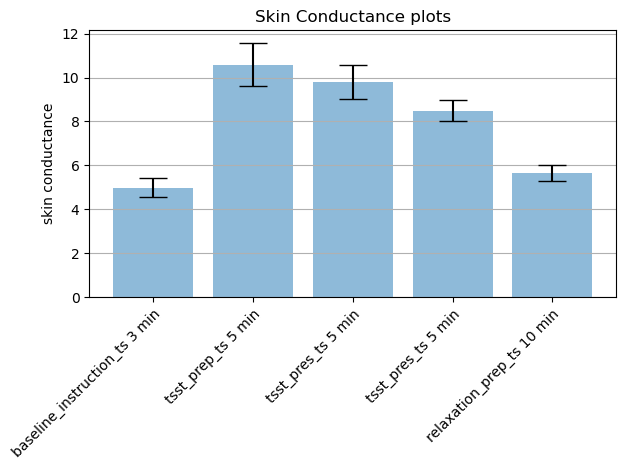

In [83]:
plot_mean_std(mean_sk_cond_list, std_sk_cond_list, x_label_plolt_sk, "Skin Conductance plots", "skin conductance") 
        

## ---------heart rate analysis

In [84]:
hr_df=read_shimmer_sensor(hr_shimmer_file_path)


In [85]:
timestamp_hr_col = "Shimmer_6B1E_Timestamp_Unix_CAL"
hr_col_name = "Shimmer_6B1E_ECG_LL-LA_24BIT_CAL"

In [91]:
hr_df = standardize_timestamps_shimmer(hr_df, timestamp_hr_col)
hr_df_selected = hr_df[[timestamp_hr_col, hr_col_name]]

In [95]:
print_start_end_time(hr_df_selected[timestamp_hr_col])

start time:1970-01-20 17:04:09.322909+01:00
end time:1970-01-20 17:04:13.332905+01:00


In [96]:
mean_hr_list,std_hr_list, x_label_plots_hr =get_mean_std_event_list(psychopy_df, hr_df_selected, event_interest_list_new, offset_min_list_new, timestamp_hr_col, hr_col_name)

In [97]:
mean_hr_list

[nan, nan, nan, nan, nan]

0        Shimmer_6B1E_Timestamp_Unix_CAL Shimmer_6B1E_ECG_LL-LA_24BIT_CAL
0                           1.699449e+09                66.21890619026496
1                           1.699449e+09                66.18832661966404
2                           1.699449e+09                66.18573024102811
3                           1.699449e+09                66.18320598402096
4                           1.699449e+09                66.17202713156071
...                                  ...                              ...
1025464                     1.699453e+09                93.65382953331824
1025465                     1.699453e+09                93.67258115679995
1025466                     1.699453e+09                93.66839810233095
1025467                     1.699453e+09                93.66371019646051
1025468                     1.699453e+09                93.65108891142475

[1025469 rows x 2 columns]

In [71]:
mean_cumm_list = []
std_cumm_list  = []
event_interets_plot = []


##---outer loop to hnadle muultiple offsets from the selected events 
for ind, event_selected in enumerate(event_interest_list_new):

    offset_list_selected_event = offset_min_list_new[ind]

    #print(event_selected)

    current_event_timestamp = get_nonNan_list_psychopy(psychopy_df, event_selected)[0]

    offset_min_list_selected = offset_min_list_new[ind]

    for offset_min in offset_min_list_selected:

        event_plot = event_selected +" "+ str(offset_min) + " min"
        event_interets_plot.append(event_plot)

        timestamp_offset = get_offset_timestamp(current_event_timestamp, offset_min)

        start_end_time_list = [current_event_timestamp, timestamp_offset]

        timestamp_start_slice = min(start_end_time_list)

        timestamp_end_slice = max(start_end_time_list)

        sensor_df_ii=slice_df_wrt_timestamps(hr_df_selected, timestamp_start_slice, timestamp_end_slice, timestamp_hr_col)

        mean_val, std_val = mean_std_col_df(sensor_df_ii, hr_col_name) 
        mean_cumm_list.append(mean_val)
        std_cumm_list.append(std_val)



        current_event_timestamp = timestamp_offset
            
            

In [72]:
sensor_df_ii

0       Shimmer_6B1E_Timestamp_Unix_CAL Shimmer_6B1E_ECG_LL-LA_24BIT_CAL
545006                     1.699451e+09                90.67347534578745
545007                     1.699451e+09                90.68551965779301
545008                     1.699451e+09                90.69330879370081
545009                     1.699451e+09                90.71927258006008
545010                     1.699451e+09                90.72619625642257
...                                 ...                              ...
698479                     1.699452e+09                94.68048091894163
698480                     1.699452e+09                94.69021733882636
698481                     1.699452e+09                94.69122704162922
698482                     1.699452e+09                94.67860575659346
698483                     1.699452e+09                94.69440039329534

[153478 rows x 2 columns]

In [63]:
mean_hr_list,std_hr_list, x_label_plolt_hr = get_mean_std_event_list(psychopy_df, hr_df_selected, event_interest_list_new, offset_min_list_new, timestamp_hr_col)

TypeError: cannot unpack non-iterable NoneType object

baseline_instruction_ts
Empty DataFrame
Columns: [Shimmer_6B1E_Timestamp_Unix_CAL, Shimmer_6B1E_ECG_LL-LA_24BIT_CAL]
Index: []
tsst_prep_ts
Empty DataFrame
Columns: [Shimmer_6B1E_Timestamp_Unix_CAL, Shimmer_6B1E_ECG_LL-LA_24BIT_CAL]
Index: []
tsst_pres_ts
Empty DataFrame
Columns: [Shimmer_6B1E_Timestamp_Unix_CAL, Shimmer_6B1E_ECG_LL-LA_24BIT_CAL]
Index: []
Empty DataFrame
Columns: [Shimmer_6B1E_Timestamp_Unix_CAL, Shimmer_6B1E_ECG_LL-LA_24BIT_CAL]
Index: []
relaxation_prep_ts
Empty DataFrame
Columns: [Shimmer_6B1E_Timestamp_Unix_CAL, Shimmer_6B1E_ECG_LL-LA_24BIT_CAL]
Index: []


C:\Users\muhammad.saif\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\muhammad.saif\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\muhammad.saif\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\muhammad.saif\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\muhammad.saif\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\muhammad.saif\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:344

In [76]:
mean_cumm_list

[nan, nan, nan, nan, nan]